In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [7]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

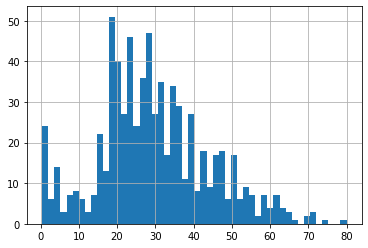

In [9]:
df['age'].hist(bins=50);

In [34]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)
X = subset[['pclass', 'sex', 'age']].copy()

In [35]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [36]:
lb = preprocessing.LabelBinarizer()

In [37]:
X['sex'] = lb.fit_transform(subset['sex'])

In [38]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [39]:
X.shape

(714, 3)

In [40]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int32  
 2   age     714 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 19.5 KB


In [42]:
y = subset['survived']

In [43]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [47]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

In [48]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [49]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9019

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       383
           1       0.92      0.83      0.87       259

    accuracy                           0.90       642
   macro avg       0.91      0.89      0.90       642
weighted avg       0.90      0.90      0.90       642


Confusion Matrix: 
 [[365  18]
 [ 45 214]]

ROC AUC: 0.8896

Average Accuracy: 	 0.8177
Accuracy SD: 		 0.0577

******************************

Test Result:

accuracy score: 0.7500

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.80        41
           1       0.76      0.61      0.68        31

    accuracy                           0.75        72
   macro avg       0.75      0.73      0.74        72
weighted avg       0.75      0.75      0.75        72


Confusion Matrix: 
 [[35  6]
 [12 19]]

ROC AUC: 0.7333



In [51]:
from sklearn.pipeline import Pipeline

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [55]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [56]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy',
                           iid=False)

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.4s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), iid=False,
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [58]:
grid_search.best_score_

0.8176356589147286

In [59]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [60]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9003

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       383
           1       0.92      0.82      0.87       259

    accuracy                           0.90       642
   macro avg       0.91      0.89      0.89       642
weighted avg       0.90      0.90      0.90       642


Confusion Matrix: 
 [[365  18]
 [ 46 213]]

ROC AUC: 0.8877

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   10.9s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.2s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.2s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.1s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.3s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.7s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.9s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.3s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.4s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.2s


Average Accuracy: 	 0.7943
Accuracy SD: 		 0.0465

******************************

Test Result:

accuracy score: 0.7500

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.80        41
           1       0.76      0.61      0.68        31

    accuracy                           0.75        72
   macro avg       0.75      0.73      0.74        72
weighted avg       0.75      0.75      0.75        72


Confusion Matrix: 
 [[35  6]
 [12 19]]

ROC AUC: 0.7333



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.3s finished
C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [62]:
from sklearn.ensemble import ExtraTreesClassifier

In [63]:
xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=100)

In [64]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [65]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9019

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       383
           1       0.95      0.80      0.87       259

    accuracy                           0.90       642
   macro avg       0.91      0.88      0.89       642
weighted avg       0.91      0.90      0.90       642


Confusion Matrix: 
 [[373  10]
 [ 53 206]]

ROC AUC: 0.8846

Average Accuracy: 	 0.8208
Accuracy SD: 		 0.0521

******************************

Test Result:

accuracy score: 0.7500

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.78      0.58      0.67        31

    accuracy                           0.75        72
   macro avg       0.76      0.73      0.73        72
weighted avg       0.76      0.75      0.74        72


Confusion Matrix: 
 [[36  5]
 [13 18]]

ROC AUC: 0.7293



In [66]:
def eval_gini(y_true, y_prob):
    """
    Original author CPMP : https://www.kaggle.com/cpmpml
    In kernel : https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini